#**Bibliotecas**

In [676]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [677]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [678]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [696]:
#https://drive.google.com/file/d/1qTEgBUto-k1chkVKUnC4jTf78ubo2j0l/view?usp=drive_link

id='1qTEgBUto-k1chkVKUnC4jTf78ubo2j0l'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('listings.csv')

In [697]:
airbnbNY = pd.read_csv('listings.csv')

# **a) Análisis exploratorio**

## **Exploración inicial**



In [698]:
airbnbNY.shape

(37541, 18)

In [501]:
airbnbNY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37541 entries, 0 to 37540
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37541 non-null  int64  
 1   name                            37539 non-null  object 
 2   host_id                         37541 non-null  int64  
 3   host_name                       37536 non-null  object 
 4   neighbourhood_group             37541 non-null  object 
 5   neighbourhood                   37541 non-null  object 
 6   latitude                        37541 non-null  float64
 7   longitude                       37541 non-null  float64
 8   room_type                       37541 non-null  object 
 9   price                           22790 non-null  float64
 10  minimum_nights                  37541 non-null  int64  
 11  number_of_reviews               37541 non-null  int64  
 12  last_review                     

In [502]:
airbnbNY.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.754100e+04,3.754100e+04,37541.000000,37541.000000,22790.000000,37541.00000,37541.00000,26001.000000,37541.000000,37541.000000,37541.000000
mean,3.783277e+17,1.682797e+08,40.728722,-73.946982,232.891795,28.98162,25.23449,0.892457,56.169974,152.796596,3.564450
std,4.643902e+17,1.820582e+08,0.056340,0.054604,1019.738134,30.70918,60.17222,1.864734,170.598777,142.535239,16.978104
min,2.595000e+03,1.678000e+03,40.500366,-74.251907,8.000000,1.00000,0.00000,0.010000,1.000000,0.000000,0.000000
25%,2.063928e+07,1.705622e+07,40.688491,-73.983108,85.000000,30.00000,0.00000,0.090000,1.000000,0.000000,0.000000
50%,4.866104e+07,8.415508e+07,40.726090,-73.954540,147.000000,30.00000,3.00000,0.320000,2.000000,128.000000,0.000000
75%,8.450413e+17,3.052402e+08,40.762380,-73.927800,250.000000,30.00000,21.00000,1.070000,8.000000,294.000000,2.000000
max,1.237702e+18,5.992925e+08,40.911390,-73.713650,100000.000000,1250.00000,1941.00000,110.100000,876.000000,365.000000,1772.000000


***Datos duplicados***

> No hay existencia de datos duplicados en el dataframe

In [503]:
airbnbNY.duplicated().any()

False

## **Tratamientos de datos nulos**

***Cantidad de datos nulos***

> Como el porcentaje de nulos de name y host_name es insignificante, lo descartaremos del dataframe.

> La columna license representa el 85% de datos nulos por tal motivo lo descartamos


> Tendremos más cuidado con los nulos de la col last_review y reviews_per_month

> Vemos que la col price presenta nulos, como esta columna es la que debemos predecir no podemos imputarlo, ya que eso alteraria nuestra predicción, por tal motivo eliminamos esos NaN que se encuentra en las filas de price

In [682]:
cantidad_nulos = airbnbNY.isnull().sum().reset_index().rename(columns = {0:'cantidad', 'index':'columnas'})
cantidad_nulos['porcentaje'] = (cantidad_nulos['cantidad'] / len(airbnbNY)) * 100
cantidad_nulos

,columnas,cantidad,porcentaje
0,id,0,0.000000
1,name,2,0.005328
2,host_id,0,0.000000
3,host_name,5,0.013319
4,neighbourhood_group,0,0.000000
5,neighbourhood,0,0.000000
6,latitude,0,0.000000
7,longitude,0,0.000000
8,room_type,0,0.000000
9,price,14751,39.293040


***Eliminación de datos nulos***

In [505]:
airbnbNY[(airbnbNY['name'].isnull()) | (airbnbNY['host_name'].isnull())]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
6785,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.69977,-73.92912,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
9449,21044649,NaN,151547086,Tanya,Bronx,Norwood,40.87553,-73.88601,Private room,NaN,30,23,2021-03-25,0.33,1,0,0,NaN
17661,10116081,NaN,51913270,Andrew,Manhattan,Midtown,40.75939,-73.96949,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0,NaN
19325,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67605,-73.95997,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
19628,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72119,-73.95279,Entire home/apt,NaN,30,1,2015-10-20,0.01,1,0,0,NaN
22232,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82992,-73.94033,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
27763,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71944,-73.95645,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0,NaN


In [699]:
airbnbNY = airbnbNY.drop([9449],axis=0)
airbnbNY = airbnbNY.drop([17661],axis=0)
airbnbNY = airbnbNY.drop([6785],axis=0)
airbnbNY = airbnbNY.drop([19325],axis=0)
airbnbNY = airbnbNY.drop([19628],axis=0)
airbnbNY = airbnbNY.drop([22232],axis=0)
airbnbNY = airbnbNY.drop([27763],axis=0)

In [700]:
airbnbNY = airbnbNY.drop(columns = ['license'])

In [701]:
airbnbNY.dropna(subset=['price'], inplace=True)

**Conversión de datos**

In [702]:
airbnbNY['neighbourhood_group'] = airbnbNY['neighbourhood_group'].astype('category')
airbnbNY['room_type'] = airbnbNY['room_type'].astype('category')

In [703]:
airbnbNY['last_review'] = pd.to_datetime(airbnbNY['last_review'])
airbnbNY['year'] = airbnbNY['last_review'].dt.year
airbnbNY['month'] = airbnbNY['last_review'].dt.month

In [704]:
# Los NaN lo convertimos en 0
airbnbNY['year'] = airbnbNY['year'].fillna(0).astype(int)
airbnbNY['month'] = airbnbNY['month'].fillna(0).astype(int)

In [705]:
airbnbNY['price'] = airbnbNY['price'].astype(int)

In [706]:
airbnbNY.shape

(22790, 19)

## **Datos outliers**

**Outlier univariados:** usamos método IQR para detectar los outliers de price

*  ***Variable price***

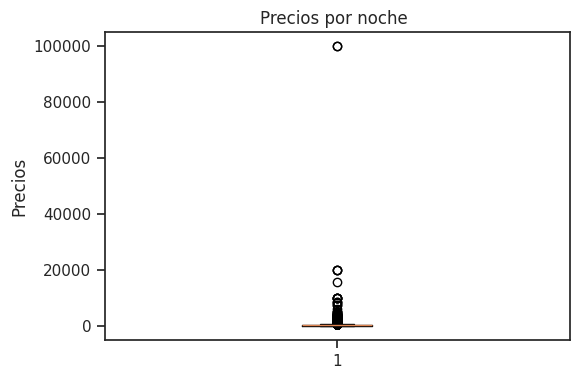

In [690]:
plt.figure(figsize=(6,4))
plt.boxplot(airbnbNY['price'])
plt.title('Precios por noche ')
plt.ylabel('Precios')
plt.show()

In [691]:
# teoría de quadril https://www.atlassian.com/data/charts/box-plot-complete-guide#:~:text=What%20is%20a%20box%20plot,line%20marking%20the%20median%20value.
def obtenerLimitesDeBoxplot(columna):

    Q1 = np.percentile(columna, 25)
    Q3 = np.percentile(columna, 75)

    #rango intercuartil (RIC)
    IQR = Q3 - Q1

    #Limite los extremos del boxplot, osea limito los outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    return limite_inferior, limite_superior

In [692]:
limite_inferior, limite_superior = obtenerLimitesDeBoxplot(airbnbNY['price'])

In [693]:
airbnbNY= airbnbNY.loc[(airbnbNY['price'] >= limite_inferior) & (airbnbNY['price'] <= limite_superior), :]

In [695]:
airbnbNY.shape

(21019, 19)

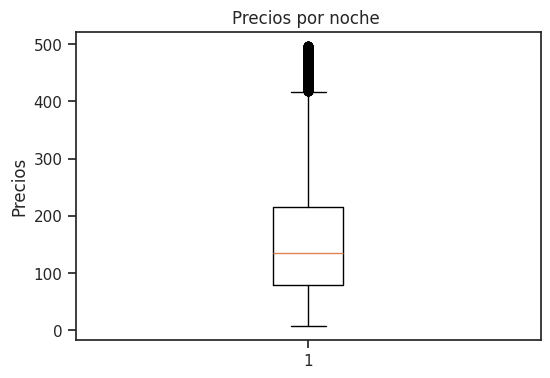

In [517]:
plt.figure(figsize=(6,4))
plt.boxplot(airbnbNY['price'])
plt.title('Precios por noche ')
plt.ylabel('Precios')
plt.show()

*  ***Variable minimum_nights***

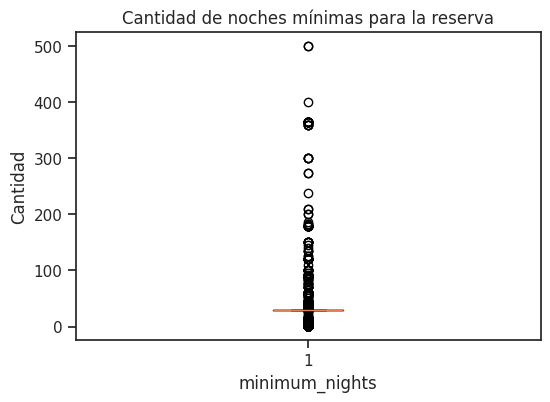

In [518]:
plt.figure(figsize=(6,4))
plt.boxplot(airbnbNY['minimum_nights'])
plt.title('Cantidad de noches mínimas para la reserva')
plt.ylabel('Cantidad')
plt.xlabel('minimum_nights')
plt.show()

In [519]:
# Consideramos que el tiempo máximo para un alquiler es de un 1 año
airbnbNY = airbnbNY.loc [airbnbNY['minimum_nights']<366, :]

In [520]:
airbnbNY.shape

(21016, 19)

## **Análisis de datos nulos de last_review**

Para esta parte, vamos previamente analizar que influencia tiene last review respecto a price

## **1- ScatterPlot**

**Relación de ultima reseña respecto a los precios de las distintos tipo de viviendas**

Se observa que la gran concentración de reseñas está dentro de los 2000 dias

In [521]:
airbnbNY['days_since_last_review'] = (pd.Timestamp.now() - airbnbNY['last_review']).dt.days
airbnbNY['days_since_last_review'] = airbnbNY['days_since_last_review'].fillna(0).astype(int)

In [522]:
sinNulos = airbnbNY[airbnbNY['days_since_last_review']>0]

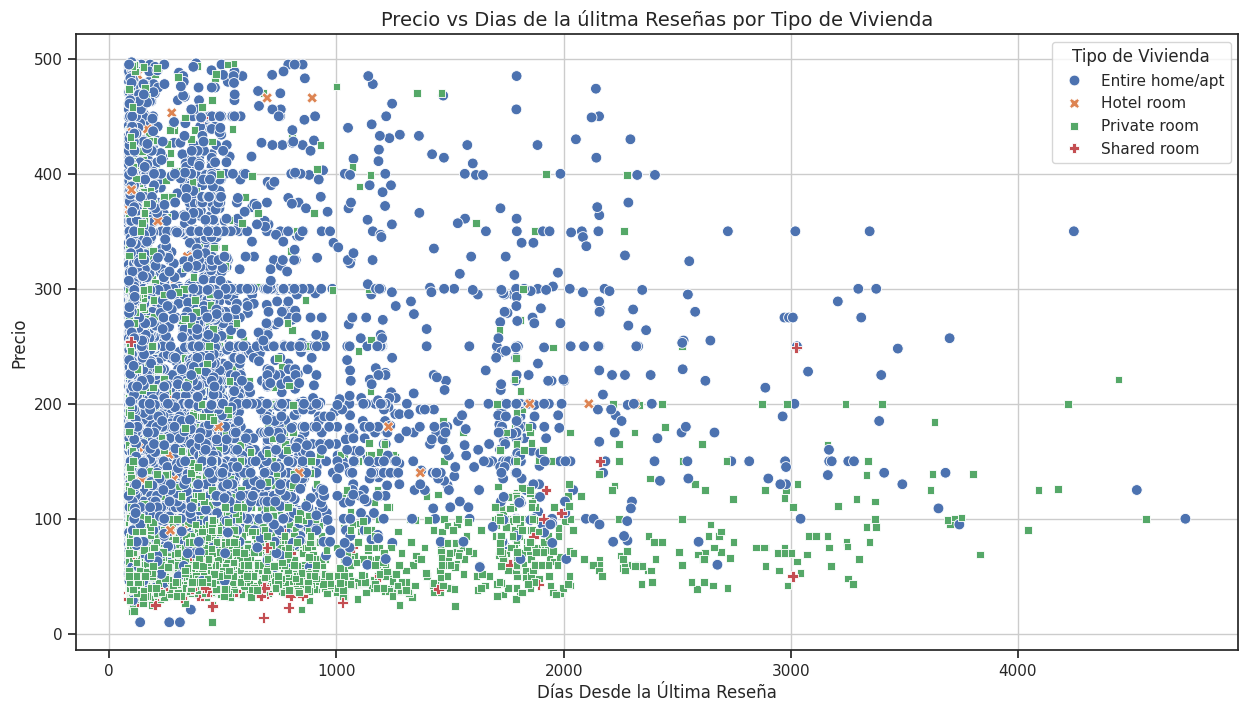

In [523]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=sinNulos, x='days_since_last_review', y='price', hue='room_type', style='room_type', s=60)
plt.title('Precio vs Dias de la úlitma Reseñas por Tipo de Vivienda', fontsize=14)
plt.xlabel('Días Desde la Última Reseña', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.grid()
plt.legend(title='Tipo de Vivienda')
plt.show()

# **2- Heatmap**

**¿Que variables numéricas del dataset tienen mejor relación con price?**

Podemos observar que price no tiene una fuerte relación las otras variables numericas, a lo "sumo" con calculated_host_listings_coun

In [524]:
sinNulos_numeric = airbnbNY[['host_id','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm','year','days_since_last_review']]

Text(1288.5468750000002, 0.5, 'Features')

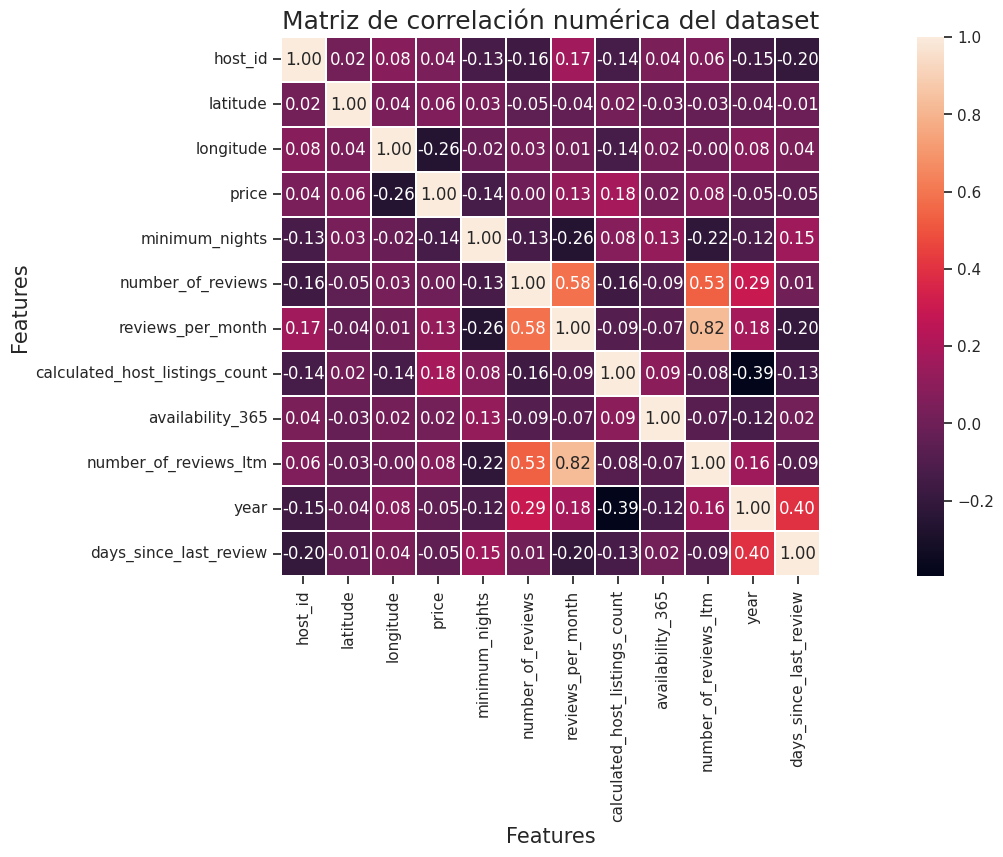

In [525]:
fig,axes=plt.subplots(figsize=(25,7))

visuaheatmap = sns.heatmap(sinNulos_numeric.corr(),ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)

visuaheatmap.set_title('Matriz de correlación numérica del dataset', fontsize=18)
visuaheatmap.set_xlabel('Features', fontsize=15)
visuaheatmap.set_ylabel('Features', fontsize=15)

## **3- Lineplot**

**¿Cómo evoluciono el precio en el transcurso de los años de reseña para las distintas viviendas?**

 En la visualización podemos observar lo sgte:

 Antes de Septiembre de 2018 no hay registro de precio de la vivienda Hotelera, a su vez en USA la etapa de pandemia se considera de 01/2020 al 09/2022, por lo que se considera años atipicos no solo en precio sino también en demanda y esto puede traer malas predicciones en nuestro caso.


In [526]:
tabla2 = sinNulos.groupby(['year', 'room_type']).agg({'price': ['mean','count','min','max']})
tabla2.columns = ['mean_price', 'count_price','min_price','max_price']
tabla2 = tabla2.reset_index()

In [527]:
#tabla2['diference_price_year'] = tabla2.groupby('room_type')['mean_price'].diff()
tabla2

,year,room_type,mean_price,count_price,min_price,max_price
0,2011,Entire home/apt,100.000000,1,100.0,100.0
1,2011,Hotel room,NaN,0,NaN,NaN
2,2011,Private room,NaN,0,NaN,NaN
3,2011,Shared room,NaN,0,NaN,NaN
4,2012,Entire home/apt,125.000000,1,125.0,125.0
5,2012,Hotel room,NaN,0,NaN,NaN
6,2012,Private room,160.500000,2,100.0,221.0
7,2012,Shared room,NaN,0,NaN,NaN
8,2013,Entire home/apt,350.000000,1,350.0,350.0
9,2013,Hotel room,NaN,0,NaN,NaN


In [528]:
sinNulos['trimestre'] = pd.PeriodIndex(sinNulos['last_review'], freq='Q').strftime('%Y-%m')

In [529]:
visua = sinNulos.sort_values('trimestre')

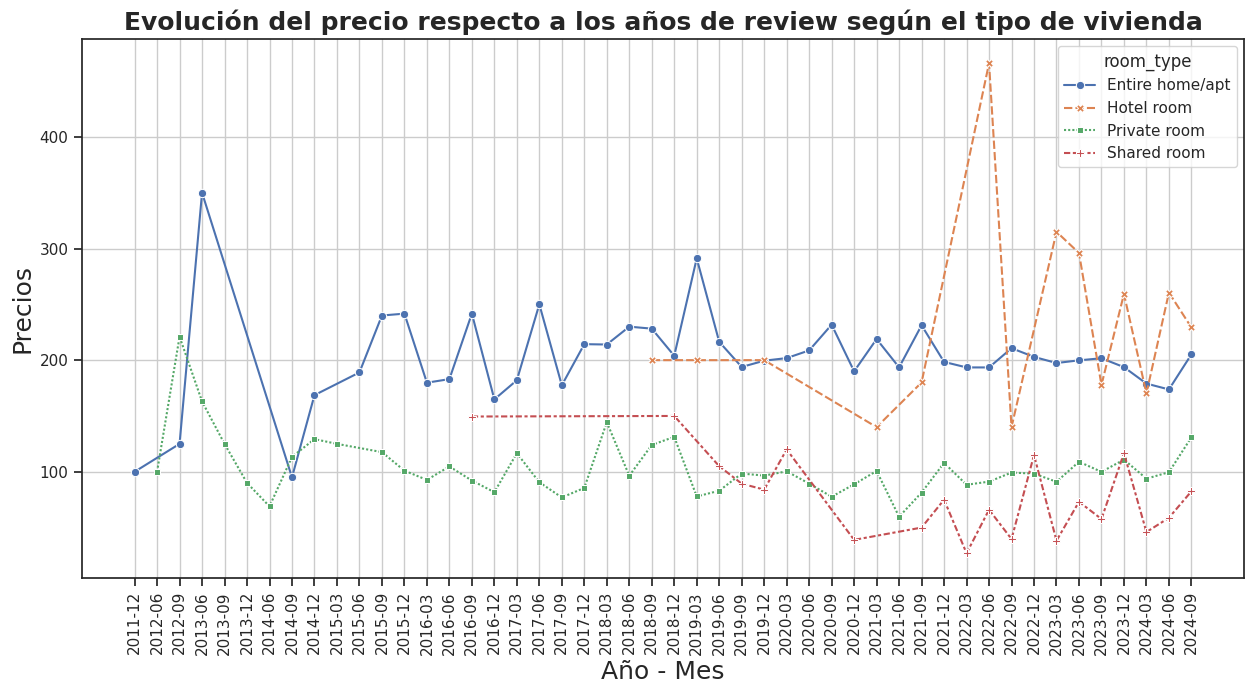

In [530]:
plt.figure(figsize=(15, 7))

visua1 = sns.lineplot(data=visua, x='trimestre', y='price', hue='room_type', errorbar=None, style = 'room_type', markers=True)

visua1.set_title('Evolución del precio respecto a los años de review según el tipo de vivienda', fontsize=18, fontweight = 'heavy')
visua1.set_xlabel('Año - Mes', fontsize=18)
visua1.set_ylabel('Precios', fontsize=18)
visua1.set_xticklabels(visua1.get_xticklabels(), rotation=90)

plt.grid(True)
plt.show()

**Conclusiones de visua 1, 2 y 3:** podemos ver que days_sice_last_review, no tiene una fuerte relación con price y a su vez vemos que dentro de los 1000 dias hay una gran concentración de datos y de forma variada.

Por otro lado también tenemos datos durante la pandemia y sabemos que esto ha generado un gran impacto socio-economico, sumado a que también hay registros de años muy "viejos" y esto influye a la hora de predecir.

En conclusión hemos decidido trabajar con los datos que tienen registros post-pandemia y luego imputar esos datos nulos que se presenta en last_review, ya que puede ser usuarios que hayan alquilado recientemente y no han realizado reseña de su experiencia

In [531]:
max(airbnbNY['last_review'])

Timestamp('2024-09-04 00:00:00')

In [532]:
opcion3 = airbnbNY.loc[(airbnbNY['last_review'] > '2022-09-04 00:00:00') | (airbnbNY['last_review'].isnull())]

In [533]:
opcion3.shape

(19556, 20)

In [534]:
opcion3.year.value_counts()

,count
year,
2024,8712
0,5845
2023,4613
2022,386


**Imputación de los datos nulos de last_review**

Para esta imputación vamos a considerar grupos similares como el precio, tipo de vivienda y zona, considerando la moda de la fecha para esos grupos similares y si no existe una moda, tomaremos una fecha promedio

In [535]:
def imputar_last_review_por_precio(opcion3):

    opcion3['last_review'] = opcion3.groupby(['neighbourhood_group', 'room_type', 'price'])['last_review'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean()))
    return opcion3


df_imputado = imputar_last_review_por_precio(opcion3)

In [536]:
def imputar_reviews_per_month(opcion3):

    opcion3['reviews_per_month'] = opcion3.groupby(['neighbourhood_group', 'room_type', 'price'])['reviews_per_month'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean()))
    return opcion3

df_imputado = imputar_reviews_per_month(opcion3)

Aún nos queda NaT sin imputar, en este caso le asignaremos estos valores a la fecha mas reciente. También sabemos que estos datos NaT que quedaron sin imputar es por que no encontraron un grupo al cual pertenecer y representa el 2,8%. Creemos que son usuarios que aún no han realizado una reseña, es por ello que le asignamos a la fecha maxima. Por otro lado a los NaT de reviews_per_month le asignamos el valor cero, ya que consideramos, al igual que  los Nat last reviews son datos muy reciente y es por ello que no tuvo reseña

In [537]:
fecha_maxima = opcion3['last_review'].max()
df_imputado['last_review'] = df_imputado['last_review'].fillna(fecha_maxima)

In [538]:
df_imputado['reviews_per_month'] = df_imputado['reviews_per_month'].fillna(0)

In [539]:
df_imputado = df_imputado.drop(columns = ['year'])
df_imputado = df_imputado.drop(columns = ['month'])

In [540]:
#df_imputado['last_review'] = pd.to_datetime(df_imputado['last_review'])
df_imputado['year'] = df_imputado['last_review'].dt.year
df_imputado['month'] = df_imputado['last_review'].dt.month

In [541]:
df_imputado.shape

(19556, 20)

## **Evolución del precio en el tiempo segun el tipo de vivienda**

In [542]:
df_imputado['Anio_mes'] = pd.PeriodIndex(df_imputado['last_review'], freq='m').strftime('%Y-%m')
visu3 = df_imputado.sort_values('Anio_mes')

Se puede observar que en el último trimestre hubo un aumento de precios en todas las viviendas excepto en share-room

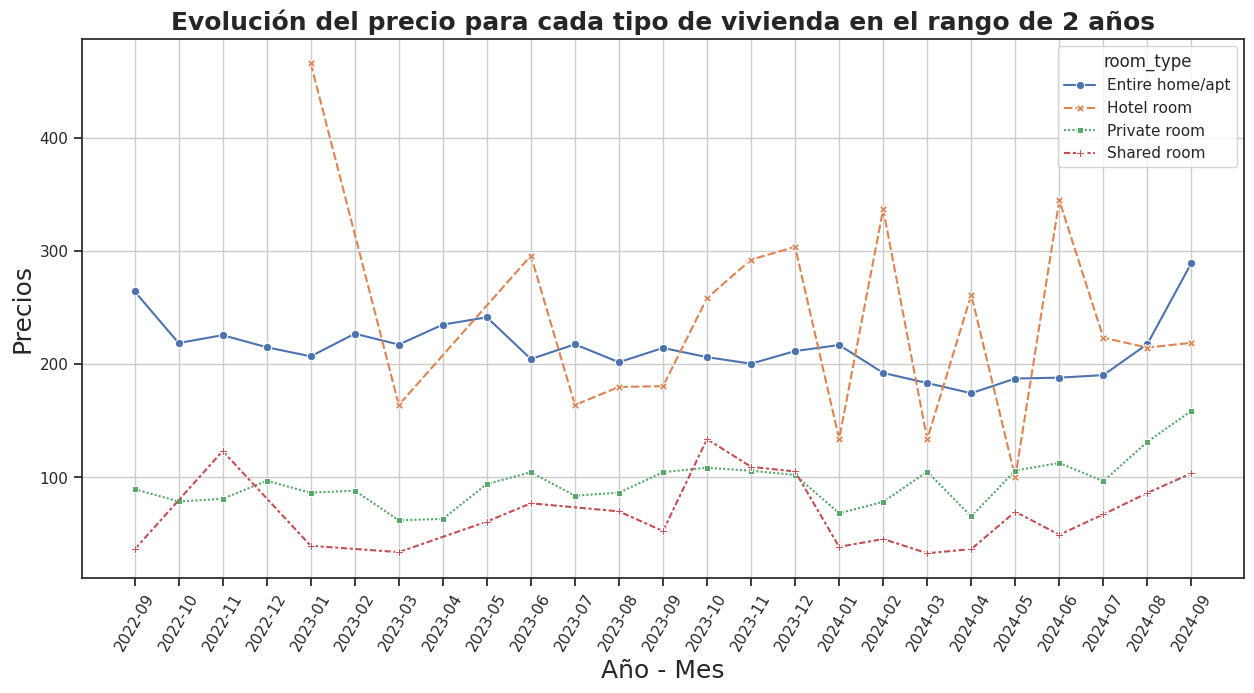

In [543]:
plt.figure(figsize=(15, 7))

visua1 = sns.lineplot(data=visu3, x='Anio_mes', y='price', hue='room_type', errorbar=None, style = 'room_type', markers=True)

visua1.set_title('Evolución del precio para cada tipo de vivienda en el rango de 2 años', fontsize=18, fontweight = 'heavy')
visua1.set_xlabel('Año - Mes', fontsize=18)
visua1.set_ylabel('Precios', fontsize=18)
visua1.set_xticklabels(visua1.get_xticklabels(), rotation=60)

plt.grid(True)
plt.show()

Una vez imputado y tratado los datos outliers, vamos a realizar el análisis de price con el resto de las variables

## **Relación de price con variables categoricas**

# **Violinplot**

**¿Cúal es el precio promedio del alquiler de en los distintos distritos?**

Manhattan es el distrito más caro con un precio promedio de de 201.73, seguido por Brooklyn con un precio promedio de 142.33 y el más económico es Bronx con un promedio de 110.19

In [544]:
precioPromedioPorZona = df_imputado.groupby('neighbourhood_group').agg({'price': ['min','max','mean','count']}).stack()
precioPromedioPorZona

price
neighbourhood_group                   
Bronx               min      25.000000
                    max     479.000000
                    mean    113.675277
                    count   813.000000
Brooklyn            min      10.000000
                    max     496.000000
                    mean    142.592400
                    count  7132.000000
Manhattan           min       8.000000
                    max     497.000000
                    mean    205.730399
                    count  7997.000000
Queens              min      25.000000
                    max     495.000000
                    mean    122.598255
                    count  3323.000000
Staten Island       min      33.000000
                    max     456.000000
                    mean    114.958763
                    count   291.000000

Text(0, 0.5, 'Precios')

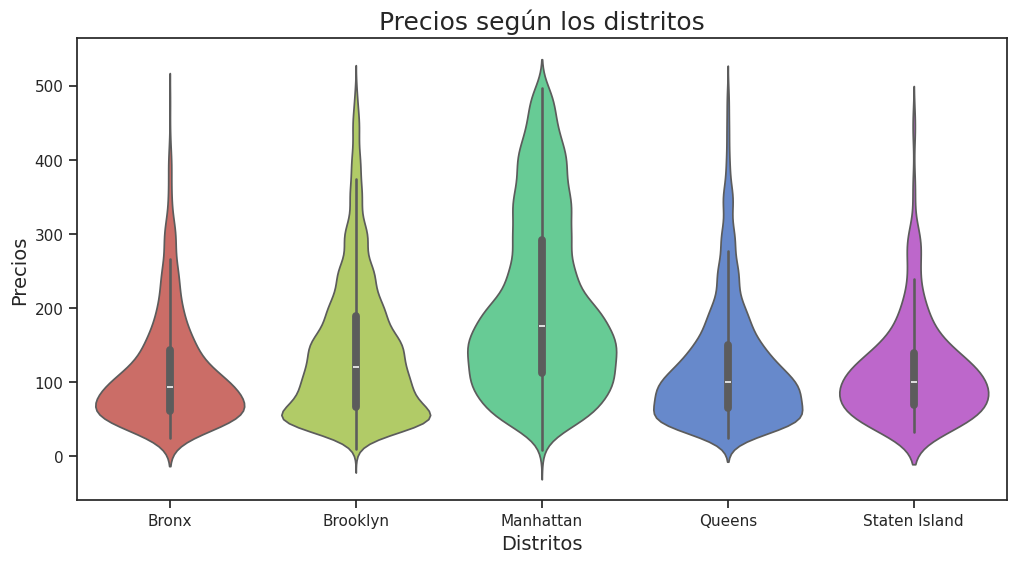

In [545]:
plt.figure(figsize=(12, 6))

boxplot1 = sns.violinplot(data = df_imputado, x="neighbourhood_group", y="price", palette = "hls")
boxplot1.set_title("Precios según los distritos", fontsize=18)
boxplot1.set_xlabel("Distritos", fontsize=14)
boxplot1.set_ylabel("Precios", fontsize=14)

**¿Cúal es el precio promedio de alquiler para las distintas viviendas en cada distrito?**

* En Bronx, Queen, Staten Island no hay ofertas de Hoteles.
* Manhattan tiene el alquiler mas alto respecto a la vivienda del tipo Entire home con un valor promedio de 234.64 y private room con un precio promedio de 142.41.
Por otro lado, Staten Island tiene el precio promedio mas baja respecto a la vivienda Entire home con un valor de 138.84
* El Bronx tiene el precio promedio mas bajo respecto a la vivienda del tipo private room con un valor de 83.40


In [546]:
tabla4bis = df_imputado.groupby(['neighbourhood_group', 'room_type']).agg({'price': ['min','max','mean','count']})
tabla4bis.columns = ['price_min','price_max','price_mean','price_count']
tabla4bis

price_min  price_max  price_mean  \
neighbourhood_group room_type                                           
Bronx               Entire home/apt       44.0      479.0  153.853801   
                    Hotel room             NaN        NaN         NaN   
                    Private room          27.0      395.0   83.409190   
                    Shared room           25.0      300.0  120.142857   
Brooklyn            Entire home/apt       29.0      496.0  197.241443   
                    Hotel room           135.0      359.0  295.500000   
                    Private room          10.0      495.0   96.530553   
                    Shared room           23.0      255.0   76.869565   
Manhattan           Entire home/apt       10.0      497.0  234.645222   
                    Hotel room             8.0      492.0  219.492462   
                    Private room          20.0      496.0  142.915481   
                    Shared room           14.0      449.0   87.393443   
Queens              Entire home/apt       46.0      495.0  172.722008   
                    Hotel room             NaN        NaN         NaN   
                    Private room          25.0      494.0   90.885296   
                    Shared room           33.0      250.0   78.714286   
Staten Island       Entire home/apt       50.0      456.0  138.843537   
                    Hotel room             NaN        NaN         NaN   
                    Private room          33.0      435.0   90.078014   
                    Shared room           99.0      144.0  114.000000   

                                     price_count  
neighbourhood_group room_type                     
Bronx               Entire home/apt          342  
                    Hotel room                 0  
                    Private room             457  
                    Shared room               14  
Brooklyn            Entire home/apt         3272  
                    Hotel room                 4  
                    Private room            3764  
                    Shared room               92  
Manhattan           Entire home/apt         5347  
                    Hotel room               199  
                    Private room            2390  
                    Shared room               61  
Queens              Entire home/apt         1295  
                    Hotel room                 0  
                    Private room            1979  
                    Shared room               49  
Staten Island       Entire home/apt          147  
                    Hotel room                 0  
                    Private room             141  
                    Shared room                3

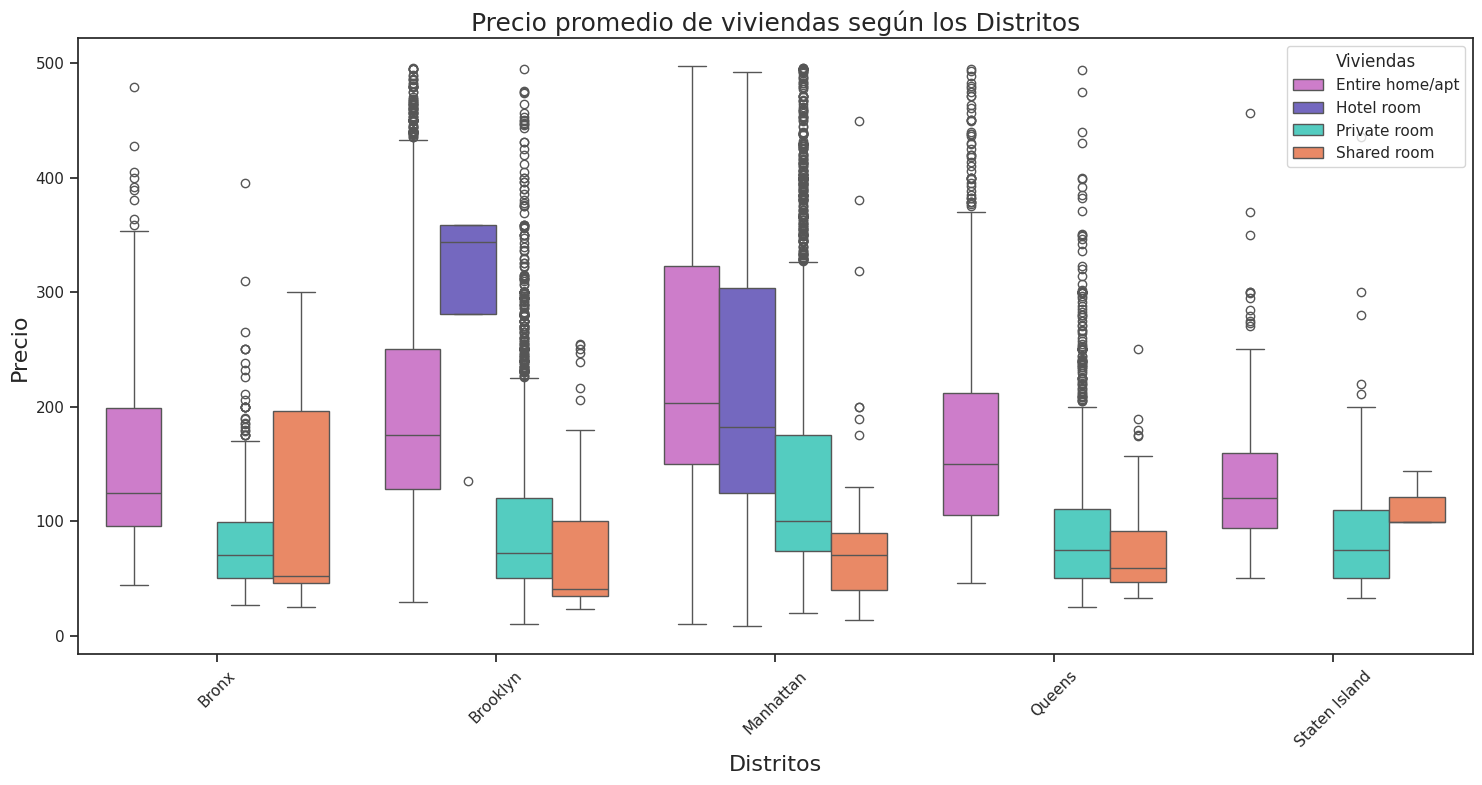

In [547]:
plt.figure(figsize=(18, 8))

sns.boxplot(x='neighbourhood_group', y='price', hue='room_type', data=df_imputado, palette=['orchid','slateblue','turquoise','coral'])

plt.title('Precio promedio de viviendas según los Distritos',fontsize=18)
plt.xlabel('Distritos',fontsize=16)
plt.ylabel('Precio', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Viviendas')

plt.show()

# **Scatter Plot**

**¿Qué distritos tienen más publicaciones?**

Se observa que Manhattan tiene más publicaciones con un registro de 7997, seguido por Brooklyn con 7132 y el que menos tiene es Staten Island

In [548]:
df_imputado.neighbourhood_group.value_counts()

,count
neighbourhood_group,
Manhattan,7997
Brooklyn,7132
Queens,3323
Bronx,813
Staten Island,291


Text(0, 0.5, 'Latitud')

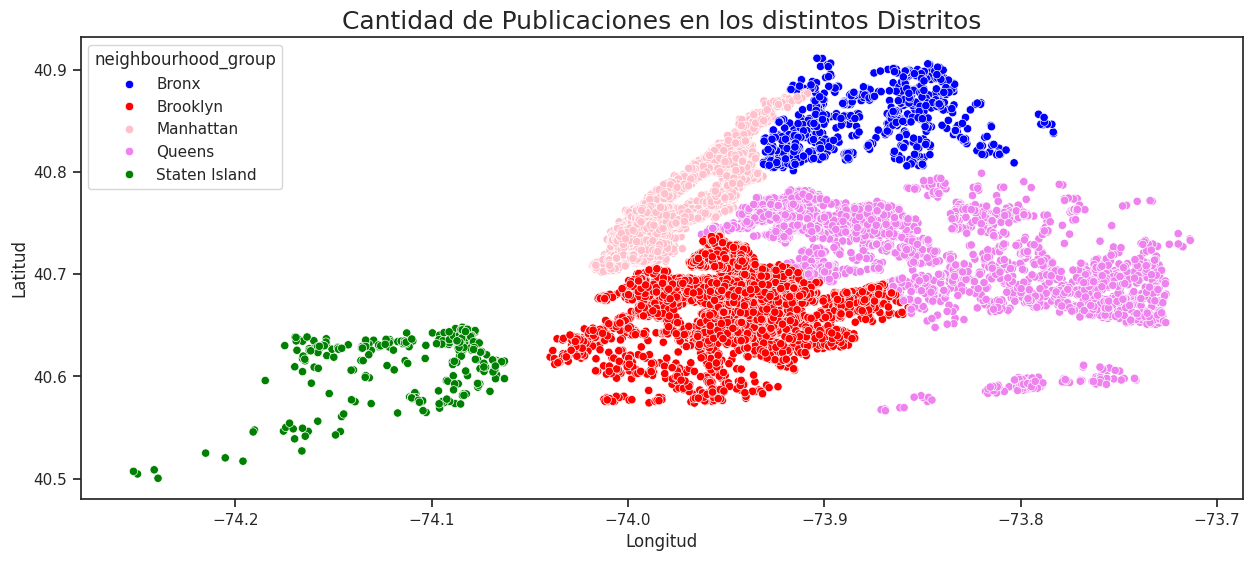

In [549]:
plt.figure(figsize=(15, 6))

visua1 = sns.scatterplot(data=df_imputado, x="longitude", y="latitude", hue="neighbourhood_group", palette = ['blue','red','pink','violet','green'])
visua1.set_title("Cantidad de Publicaciones en los distintos Distritos", fontsize=18)
visua1.set_xlabel("Longitud", fontsize = 12)
visua1.set_ylabel("Latitud", fontsize = 12)

**¿A mayor cantidad de publicaciones, baja los precios? (Ley de oferta y demanda)**

En gral si se cumple, abunda más las publicaciones de menor precio y pocas de mayor precio

In [550]:
# Precio promedio según el tipo de vivienda de cada barrio
df_imputado['avg_price_neighbourhood_typeroom'] = df_imputado.groupby(['room_type','neighbourhood'])['price'].transform(lambda x: x.mean())

In [551]:
# Cantidad de publicaciones por barrio según el tipo de vivienda
df_imputado['total_public_neighbourhood_typeroom'] = df_imputado.groupby(['room_type','neighbourhood'])['id'].transform('count')

In [552]:
#barrio_vivienda2 = opcion3.drop_duplicates(['room_type','neighbourhood'], keep = 'first')[['neighbourhood_group','neighbourhood','room_type','avg_price_neighbourhood_typeroom','total_public_neighbourhood_typeroom']]

In [553]:
#Brooklyn = barrio_vivienda2[barrio_vivienda2['neighbourhood_group']=='Brooklyn']
#Brooklyn.nlargest(60, 'total_public_neighbourhood_typeroom')
#Brooklyn.nunique()

<Axes: xlabel='price', ylabel='Count'>

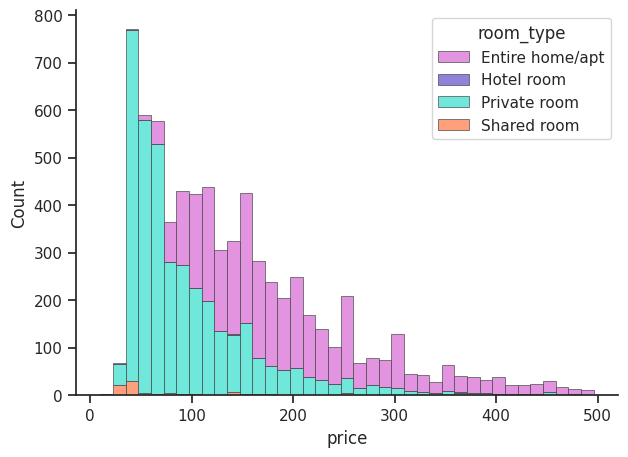

In [554]:
Brooklyn = df_imputado[df_imputado['neighbourhood_group']=='Brooklyn']

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(Brooklyn, x="price", hue="room_type", multiple="stack", palette=['orchid','slateblue','turquoise','coral'],edgecolor=".3",linewidth=.5)

Text(0.5, 1.0, 'Variación del precio en Manhattan según la cantidad de publicaciones')

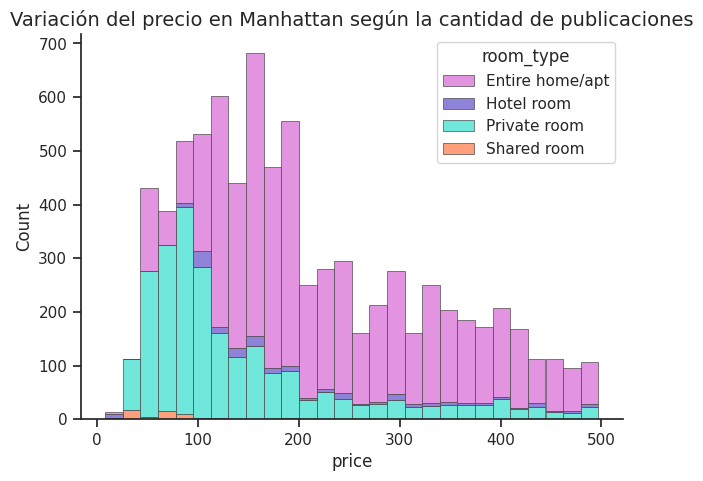

In [555]:
Manhattan = df_imputado[df_imputado['neighbourhood_group']=='Manhattan']

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(Manhattan, x="price", hue="room_type", multiple="stack", palette=['orchid','slateblue','turquoise','coral'],edgecolor=".3",linewidth=.5)

plt.title('Variación del precio en Manhattan según la cantidad de publicaciones',fontsize=14)

Text(0.5, 1.0, 'Variación del precio en State Island según la cantidad de publicaciones')

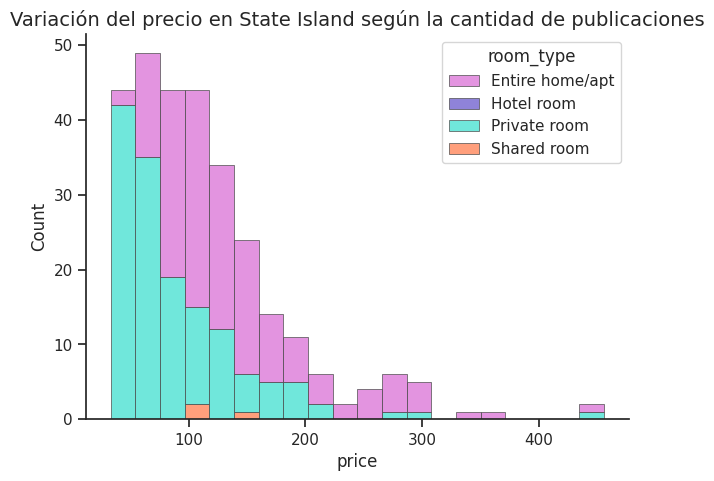

In [556]:
Island = df_imputado[df_imputado['neighbourhood_group']=='Staten Island']

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(Island, x="price", hue="room_type", multiple="stack", palette=['orchid','slateblue','turquoise','coral'],edgecolor=".3",linewidth=.5)

plt.title('Variación del precio en State Island según la cantidad de publicaciones',fontsize=14)

Text(0.5, 1.0, 'Variación del precio en Bronx según la cantidad de publicaciones')

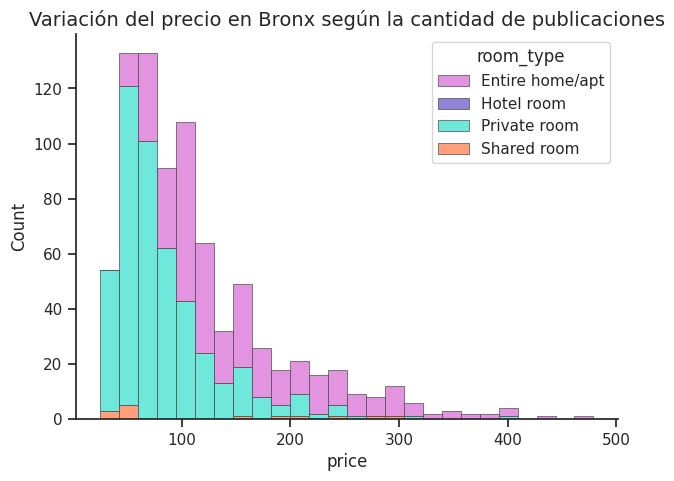

In [557]:
Bronx = df_imputado[df_imputado['neighbourhood_group']=='Bronx']

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(Bronx, x="price", hue="room_type", multiple="stack", palette=['orchid','slateblue','turquoise','coral'],edgecolor=".3",linewidth=.5)

plt.title('Variación del precio en Bronx según la cantidad de publicaciones',fontsize=14)

Text(0.5, 1.0, 'Variación del precio en Queens según la cantidad de publicaciones')

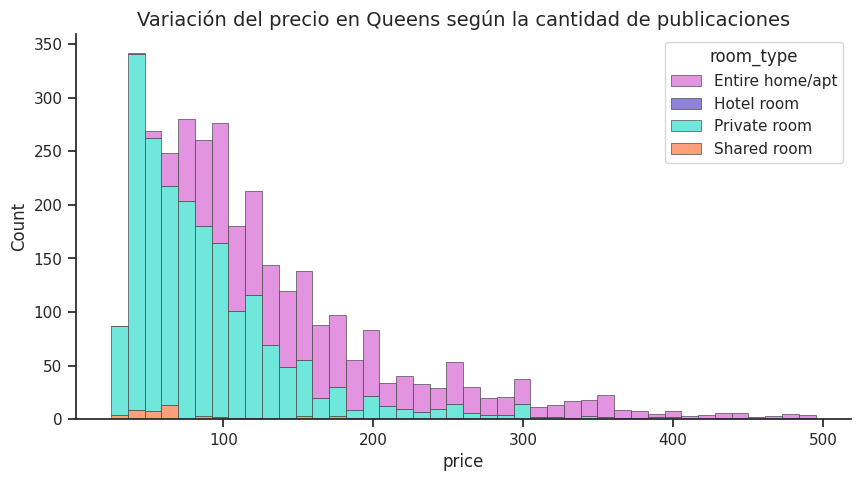

In [558]:
Queens = df_imputado[df_imputado['neighbourhood_group']=='Queens']

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.histplot(Queens, x="price", hue="room_type", multiple="stack", palette=['orchid','slateblue','turquoise','coral'],edgecolor=".3",linewidth=.5)

plt.title('Variación del precio en Queens según la cantidad de publicaciones',fontsize=14)


**¿Qué distritos tienen los barrios más caros y más baratos?**

Se puede observar que en Manhattan,Brooklyn y Queens se encuentra los barrios donde es más alto el alquiler

Lo más economicos esta en el distrito de Staten Island

In [559]:
df_imputado['avg_price_neighbourhood'] = df_imputado.groupby(['neighbourhood_group','neighbourhood'])['price'].transform(lambda x: x.mean())

<Figure size 1800x1600 with 0 Axes>

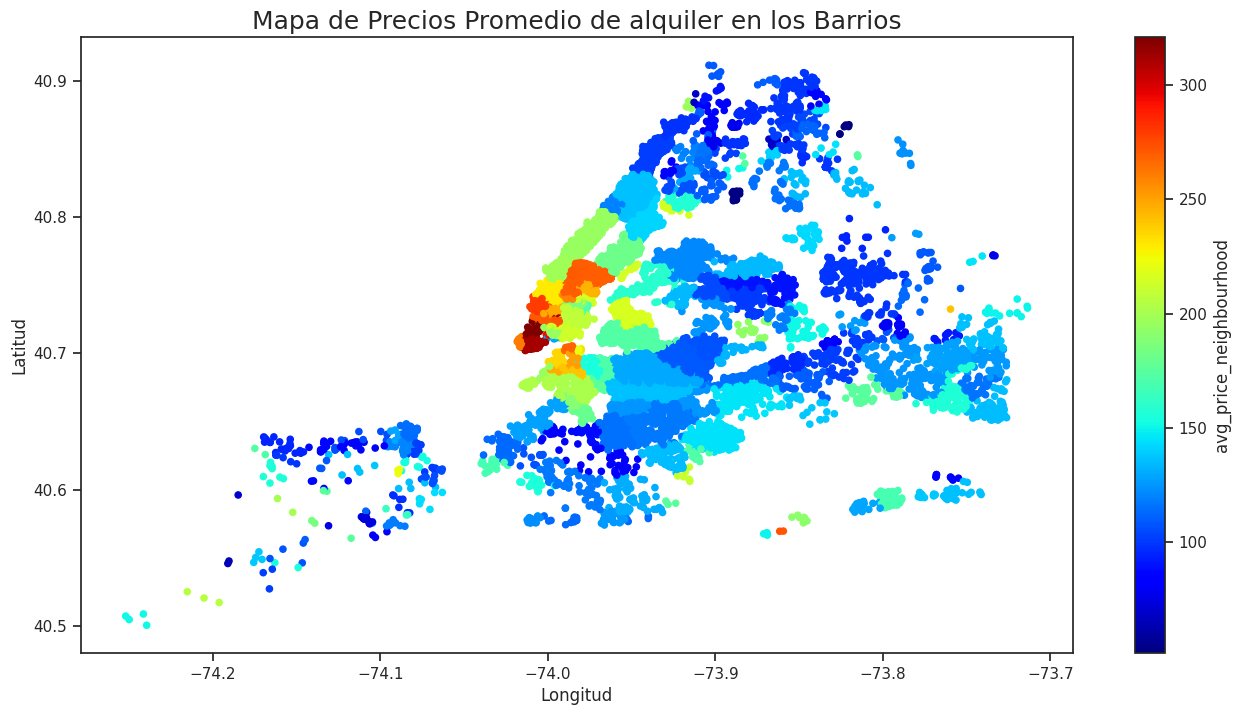

In [560]:
plt.figure(figsize=(18, 16))

df_imputado.plot.scatter(x="longitude", y="latitude", c="avg_price_neighbourhood", figsize=(16, 8), cmap='jet')

plt.title('Mapa de Precios Promedio de alquiler en los Barrios', fontsize=18)
plt.xlabel('Longitud', fontsize = 12)
plt.ylabel('Latitud', fontsize = 12)

plt.show()

**Top ten de los barrios más caros y más ecocómicos**

> Podemos observar que el barrio más caro es Tribeca y se encuentra dentro de Manhattan con un promedio de $320.91

> Dentro de los barrios más economicos se encuentra Co-op City que se encuentra dentro de Bronx y Staten Island con un precio pomedio de $51.50


In [561]:
TopTenBarriosMasCaros = df_imputado.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().rename(columns={"price": "avg_price_neighbourhood"})
TopTenBarriosMasCaros.nlargest(10, 'avg_price_neighbourhood', keep='all')

,neighbourhood_group,neighbourhood,avg_price_neighbourhood
639,Manhattan,Tribeca,320.912500
587,Manhattan,NoHo,312.666667
517,Manhattan,Financial District,311.500000
480,Manhattan,Civic Center,294.000000
651,Manhattan,West Village,279.664557
588,Manhattan,Nolita,273.043011
804,Queens,Neponsit,272.000000
620,Manhattan,SoHo,271.324675
633,Manhattan,Theater District,270.909910
571,Manhattan,Midtown,269.945578


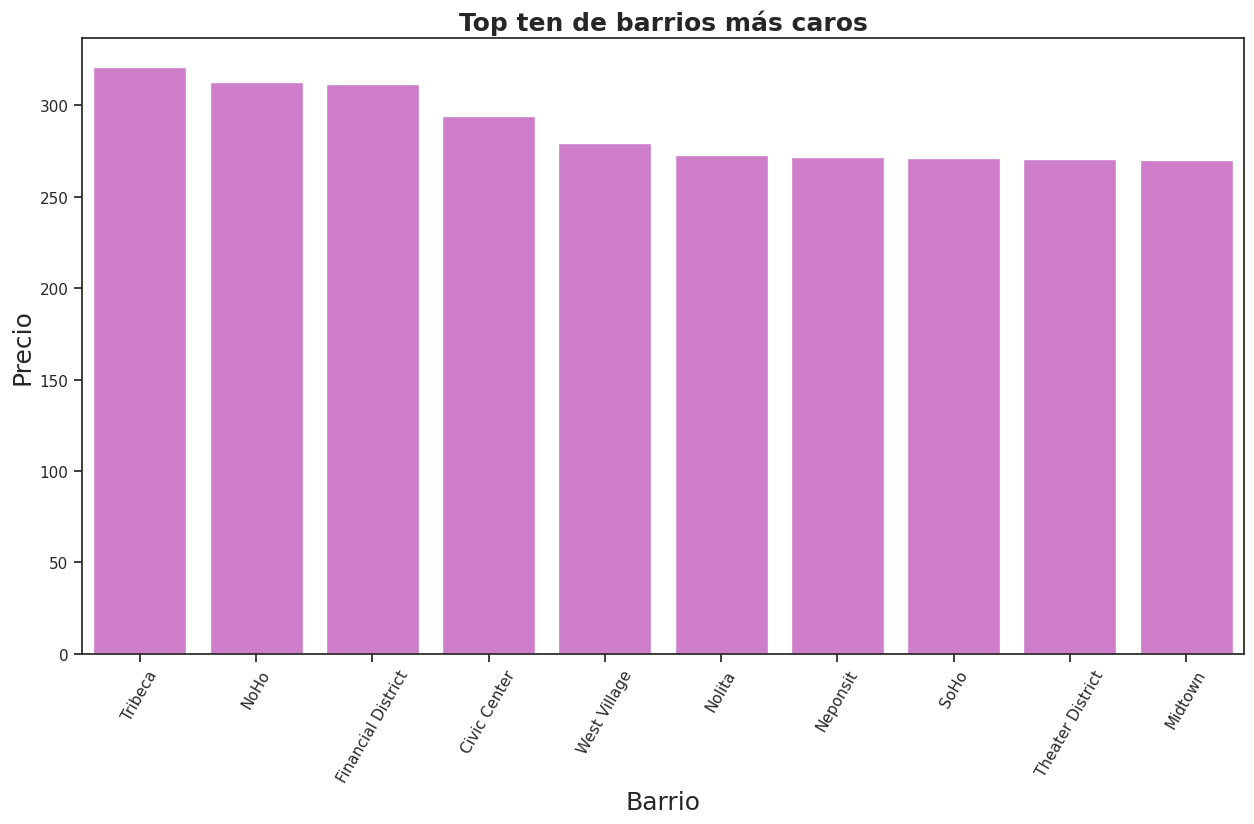

In [562]:
plt.figure(figsize=(15, 8))

ax= sns.barplot(x = 'neighbourhood', y = 'avg_price_neighbourhood', data=TopTenBarriosMasCaros.nlargest(10, 'avg_price_neighbourhood'), palette=['orchid'])

plt.title('Top ten de barrios más caros',fontsize=18, fontweight = 'heavy')
plt.xlabel('Barrio', fontsize=18)
plt.ylabel('Precio', fontsize=18)

ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

plt.show()

In [563]:
TopTenBarriosMasBaratos = df_imputado.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().rename(columns={"price": "avg_price_neighbourhood"})
TopTenBarriosMasBaratos.nsmallest(10, 'avg_price_neighbourhood', keep='all')

,neighbourhood_group,neighbourhood,avg_price_neighbourhood
43,Bronx,Co-op City,51.500000
104,Bronx,Hunts Point,52.833333
1103,Staten Island,Woodrow,65.000000
168,Bronx,Riverdale,67.500000
24,Bronx,Bronxdale,68.888889
919,Staten Island,"Chelsea, Staten Island",70.000000
974,Staten Island,Grant City,73.846154
1050,Staten Island,Richmondtown,75.000000
781,Queens,Little Neck,77.000000
80,Bronx,Fordham,78.714286


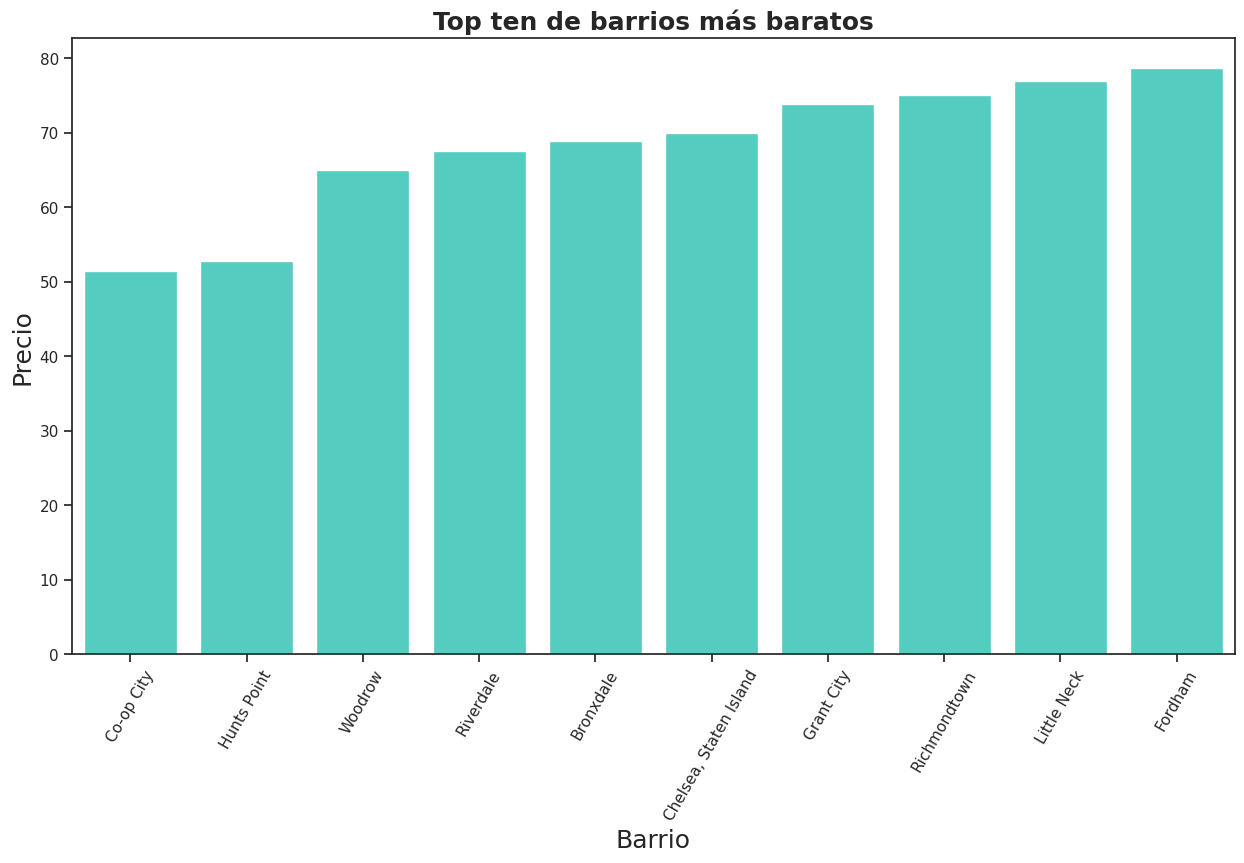

In [564]:
plt.figure(figsize=(15, 8))

ax= sns.barplot(x = 'neighbourhood', y = 'avg_price_neighbourhood', data=TopTenBarriosMasCaros.nsmallest(10, 'avg_price_neighbourhood'), palette=['turquoise'])

plt.title('Top ten de barrios más baratos',fontsize=18, fontweight = 'heavy')
plt.xlabel('Barrio', fontsize=18)
plt.ylabel('Precio', fontsize=18)

ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

# **Features**

Se crea estos features con el fín de tener un un modelo predictivo más robusto y eficiente.

* **tipo_anfitrion:** identifica si es un propietario o un negocio inmobliario
* **total_public_neighbourhood_typeroom:** total de publicaciones por barrio segun el tipo de vivienda
* **avg_price_neighbourhood_typeroom:** precio promedio del tipo de vivienda segun cada barrio
* **avg_price_neighbourhood:** Precio promedio por barrio
* **avg_month_neighbourhood:** precio promedio mensual de las viviendas segun cada barrio:
* **days_since_last_review:** cantidad de dias desde su ultima reseña
* **trimestre:** agrupa los registros de forma trimestral




In [565]:
def identificar_anfitrion(calculated_host_listings_count):

    if calculated_host_listings_count > 5:
        return 'Empresa'
    else:
        return 'Persona'


df_imputado['tipo_anfitrion'] = df_imputado['calculated_host_listings_count'].apply(identificar_anfitrion)

In [566]:
# precio promedio mensual de las viviendas segun cada barrio
df_imputado['avg_month_neighbourhood'] = df_imputado.groupby(['Anio_mes','neighbourhood','room_type'])['price'].transform('mean')

In [567]:
df_imputado['trimestre'] = pd.PeriodIndex(df_imputado['last_review'], freq='Q').strftime('%Y-%m')

In [568]:
# precio promedio trimestral de las viviendas segun cada barrio
df_imputado['avg_quarter_neighbourhood'] = df_imputado.groupby(['trimestre','neighbourhood','room_type'])['price'].transform('mean')

In [569]:
#df_imputado['trimestre'] = df_imputado['trimestre'].astype('category')
df_imputado['Anio_mes'] = df_imputado['Anio_mes'].astype('category')
df_imputado['tipo_anfitrion'] = df_imputado['tipo_anfitrion'].astype('category')
df_imputado['neighbourhood'] = df_imputado['neighbourhood'].astype('category')

In [570]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19556 entries, 0 to 37538
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   id                                   19556 non-null  int64         
 1   name                                 19556 non-null  object        
 2   host_id                              19556 non-null  int64         
 3   host_name                            19556 non-null  object        
 4   neighbourhood_group                  19556 non-null  category      
 5   neighbourhood                        19556 non-null  category      
 6   latitude                             19556 non-null  float64       
 7   longitude                            19556 non-null  float64       
 8   room_type                            19556 non-null  category      
 9   price                                19556 non-null  int64         
 10  minimum_nights 

In [571]:
df_imputado.shape

(19556, 28)

# **b) Entrenamiento**

## **Librerias**

In [572]:
!pip install category_encoders

In [573]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Para el encodeo
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

# Para los modelos (Lineal, XGBoost y Random Forest)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Para las métricas (Errores)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## **Dataframe a entrena**r

Vemos que los patrones que más influyen en el precio es el barrio, el distrito al que pertenece, la cantidad de publicaciones que tiene cada barrio, el tipo de vivienda y el tipo de anfitrion

In [574]:
#df_imputado.columns

In [575]:
#df_imputado.nunique()

In [576]:
dfinal = df_imputado[['neighbourhood_group','neighbourhood','room_type', 'price', 'number_of_reviews', 'number_of_reviews_ltm','total_public_neighbourhood_typeroom', 'tipo_anfitrion','trimestre']]

In [577]:
#dfinal.nunique()

## **Separando variables a predecir**



In [578]:
x = dfinal.drop('price', axis=1)
y = dfinal['price']

##**Separo variable de entrenamiento y test**



In [579]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Vamos a transformar la variable price objetivo por si tiene una distribución sesgada o no normal, en el cual  para el modelo va ser dificil ajustarse

In [580]:
#Transformación logarítmica
y_test = np.log1p(y_test)
y_train = np.log1p(y_train)

## **Encoder**

1. **OneHotEncoder:** usaremos para los features que tienen menos de 10 categorias, se usará OneHotEncode
2. **MeanEnconding:** usaremos para los features con mas de 10 categories se usara MeanEncoding

## **1- OneHotEnconder**


In [581]:
#Variables a encodear: neighbourhood_group (5), room_type(4), tipo_anfitrion(2)

categoricasColumns = ['neighbourhood_group', 'room_type', 'tipo_anfitrion', 'trimestre']

enc = OneHotEncoder(handle_unknown="ignore")

for col in categoricasColumns:
    if col == 'tipo_anfitrion':
        encoder = OneHotEncoder(handle_unknown="ignore", drop='first')
    else:
        encoder = enc

    # Para x_train
    encoder_x_train = encoder.fit_transform(x_train[[col]]).todense()
    encoder_x_train = pd.DataFrame(encoder_x_train)
    encoder_x_train.columns = encoder.get_feature_names_out([col])
    encoder_x_train.index = x_train.index
    x_train = pd.concat([x_train, encoder_x_train], axis=1).drop(columns=col)

    # Para x_test
    encoder_x_test = encoder.transform(x_test[[col]]).todense()
    encoder_x_test = pd.DataFrame(encoder_x_test)
    encoder_x_test.columns = encoder.get_feature_names_out([col])
    encoder_x_test.index = x_test.index
    x_test = pd.concat([x_test, encoder_x_test], axis=1).drop(columns=col)


In [582]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3912 entries, 22710 to 3133
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   neighbourhood                        3912 non-null   category
 1   number_of_reviews                    3912 non-null   int64   
 2   number_of_reviews_ltm                3912 non-null   int64   
 3   total_public_neighbourhood_typeroom  3912 non-null   int64   
 4   neighbourhood_group_Bronx            3912 non-null   float64 
 5   neighbourhood_group_Brooklyn         3912 non-null   float64 
 6   neighbourhood_group_Manhattan        3912 non-null   float64 
 7   neighbourhood_group_Queens           3912 non-null   float64 
 8   neighbourhood_group_Staten Island    3912 non-null   float64 
 9   room_type_Entire home/apt            3912 non-null   float64 
 10  room_type_Hotel room                 3912 non-null   float64 
 11  room_type_Private 

In [583]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15644 entries, 27940 to 30478
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   neighbourhood                        15644 non-null  category
 1   number_of_reviews                    15644 non-null  int64   
 2   number_of_reviews_ltm                15644 non-null  int64   
 3   total_public_neighbourhood_typeroom  15644 non-null  int64   
 4   neighbourhood_group_Bronx            15644 non-null  float64 
 5   neighbourhood_group_Brooklyn         15644 non-null  float64 
 6   neighbourhood_group_Manhattan        15644 non-null  float64 
 7   neighbourhood_group_Queens           15644 non-null  float64 
 8   neighbourhood_group_Staten Island    15644 non-null  float64 
 9   room_type_Entire home/apt            15644 non-null  float64 
 10  room_type_Hotel room                 15644 non-null  float64 
 11  room_type_Privat

## **2- MeanEncoding**



In [584]:
#Variables a encodear: neighbourhood (220), Anio_mes(25)

columnasME = ['neighbourhood']

for col in columnasME:
   menc_x_train = x_train.copy()
   menc_x_train['price'] = y_train
   Mean_encoded = menc_x_train.groupby([col])['price'].mean().to_dict()

    #Para el train
   x_train[col] = x_train[col].map(Mean_encoded)

    #Para test
   x_test[col] = x_test[col].map(Mean_encoded)

   mean_global = y_train.mean()
   x_test[col] = x_test[col].fillna(mean_global)

## **Entrenamos con los distintos modelos**

Para todos los modelos se va evaluar los sgtes errores:

* Error Cuadratico Medio (MSE)
* Error Absoluto Medio (MAE)
* Error Raiz Cuadratica Medio (RMSE)
* Error coeficiente de determinación (R²)

# **Modelo 1: Regresión Lineal**

En este caso vamos a probar con 2 tipos de funciones, una lineal y otra de transformación polinómica para ver la performance y flexibilidad que tiene la pólinomica respecto a la lineal

**Evaluar la performance del modelo en el conjunto de evaluación, explicar todas las métricas. Comparar con la performance de entrenamiento**

La regresión lineal polinómica supera a la regresión lineal simple en todas las métricas de evaluación (MSE, RMSE, MAE, y R²). El modelo polinómico logra una mejor precisión de predicción y explicación de la variabilidad de los datos en comparación con la regresión lineal simple. Aunque la diferencia no es enorme, el modelo polinómico es más adecuado para predecir el precio del alquiler de un Airbnb en función de las métricas obtenidas. La transformación polinómica permite al modelo capturar mejor las relaciones no lineales entre las características y el precio, lo que mejora su desempeño.

* ***Función Lineal sin transformación***

In [674]:
modelRL = LinearRegression()
modelRL.fit(x_train, y_train)

LinearRegression()

In [675]:
y_pred = modelRL.predict(x_test)
y_pred_train = modelRL.predict(x_train)

**Evaluación del modelo**





**Errores y métricas de la función lineal sin tranformación**

In [669]:
# Calculo de errores en el test
errorL_mse = mean_squared_error(y_test, y_pred)
errorL_rmse = np.sqrt(errorL_mse)
errorL_mae = mean_absolute_error(y_test, y_pred)
L_r2 = r2_score(y_test, y_pred)

# Métricas
print("Métricas en el conjunto de prueba:")
print("MSE (Test):", errorL_mse)
print("RMSE (Test):", errorL_rmse)
print("MAE (Test):", errorL_mae)
print("R² (Test):", L_r2)

# Calculo de errores sobre el train
errorL_mse_train = mean_squared_error(y_train, y_pred_train)
errorL_rmse_train = np.sqrt(errorL_mse_train)
errorL_mae_train = mean_absolute_error(y_train, y_pred_train)
L_r2_train = r2_score(y_train, y_pred_train)

# Metricas sobre train
print("\nMétricas en el conjunto de entrenamiento:")
print('MSE (Train):', errorL_mse_train)
print('RMSE (Train):', errorL_rmse_train)
print("MAE (Train):", errorL_mae_train)
print('R² Score (Train):', L_r2_train)

Métricas en el conjunto de prueba:
MSE (Test): 0.23924856937282848
RMSE (Test): 0.4891304216390844
MAE (Test): 0.38630705272313676
R² (Test): 0.4645612025440381

Métricas en el conjunto de entrenamiento:
MSE (Train): 0.23244935173979914
RMSE (Train): 0.48213001538983147
MAE (Train): 0.38265709200688974
R² Score (Train): 0.4785767952827147


* ***Función con transformación Polinómica:*** cuando probamos los features en polinomicos, para capturar relaciones no lineales entre las variables, nos dimos cuenta que con una funcion polinomicas, nos da mejor el modelo

In [591]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

Entreno el modelo de regresión lineal

In [670]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [672]:
y_pred_poly = model.predict(x_test_poly)
y_pred_poly_train = model.predict(x_train_poly)

**Evaluación del modelo**


**2- Errores y métricas de la función con transformación**

In [673]:
# Calculo de errores en el test
errorLP_mse = mean_squared_error(y_test, y_pred_poly)
errorLP_rmse = np.sqrt(errorLP_mse)
errorLP_mae = mean_absolute_error(y_test, y_pred_poly)
LP_r2 = r2_score(y_test, y_pred_poly)

# Métricas
print("Métricas en el conjunto de prueba:")
print("MSE (Test):", errorLP_mse)
print("RMSE (Test):", errorLP_rmse)
print("MAE (Test):", errorLP_mae)
print("R² (Test):", LP_r2)

# Calculo de errores sobre el train
errorLP_mse_train = mean_squared_error(y_train, y_pred_poly_train)
errorLP_rmse_train = np.sqrt(errorL_mse_train)
errorLP_mae_train = mean_absolute_error(y_train, y_pred_poly_train)
LP_r2_train = r2_score(y_train, y_pred_poly_train)

# Metricas sobre train
print("\nMétricas en el conjunto de entrenamiento:")
print('MSE (Train):', errorLP_mse_train)
print('RMSE (Train):', errorLP_rmse_train)
print("MAE (Train):", errorLP_mae_train)
print('R² Score (Train):', LP_r2_train)

Métricas en el conjunto de prueba:
MSE (Test): 0.21540224466371227
RMSE (Test): 0.46411447366324643
MAE (Test): 0.36087333657584875
R² (Test): 0.5179293269991374

Métricas en el conjunto de entrenamiento:
MSE (Train): 0.20646847889110592
RMSE (Train): 0.48213001538983147
MAE (Train): 0.3551126873317826
R² Score (Train): 0.5368562866244772


 **Identificar los features más importantes para predecir el precio del alquiler**

 Se puede ver que la feature mas importante influye el barrio **(neighbourhood)**, seguido por el tipo de vivienda **Entire home/apt** y de dueño directo, esto es posible, ya que una inmobiliaria también cobra una comisión.
 El feature nuevo que era cantidad de publicaciones por barrio, se ve que no es de suma importancia y también notamos que las personas buscan más por la zona de **Manhattan**

In [616]:
columnas = x_train.columns

In [626]:
modelRL.coef_

array([ 7.37115851e-01, -3.50874301e-05,  2.18366514e-03, -3.35477725e-06,
       -1.87227574e-02,  2.46189440e-02,  5.63086026e-02,  1.73780621e-02,
       -7.95828513e-02,  4.07940074e-01,  1.82419586e-01, -1.71083563e-01,
       -4.19276097e-01,  1.93601783e-01,  2.70720542e-02, -1.62264200e-03,
       -4.55843421e-02,  2.71384599e-02,  5.23979995e-02,  6.51406135e-02,
       -1.13084065e-01, -9.41221807e-02,  8.26641029e-02])

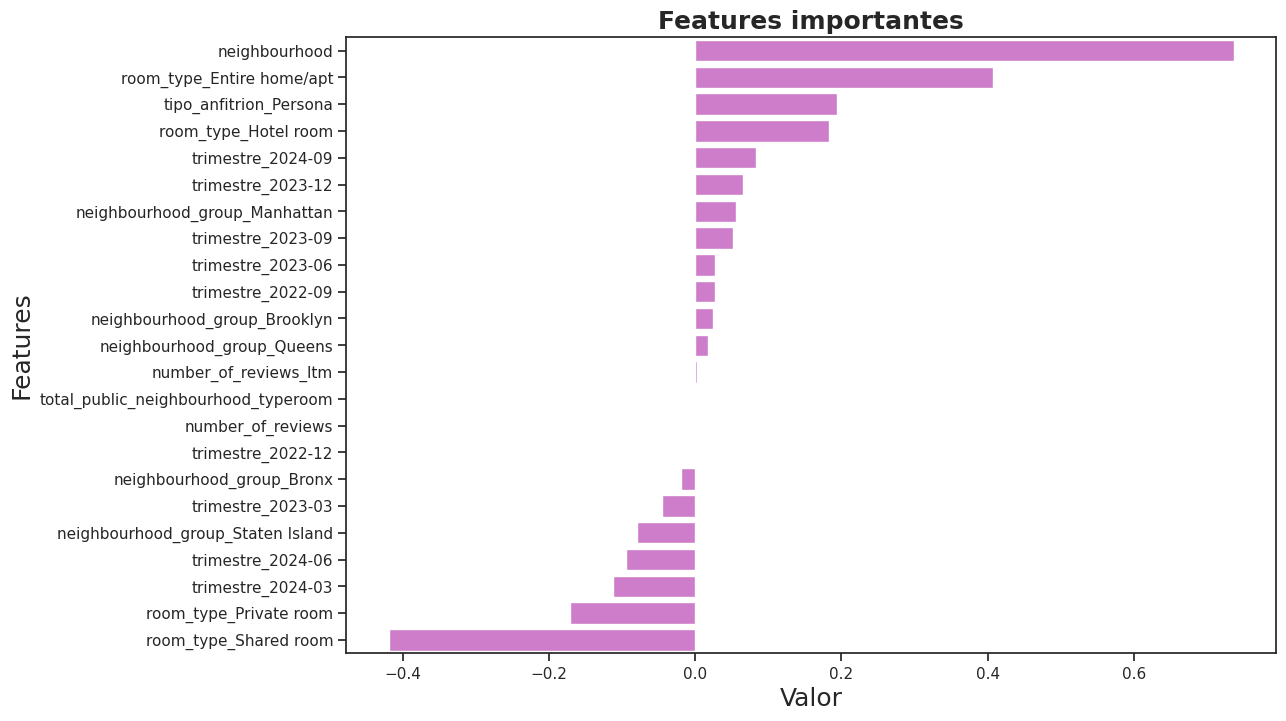

In [624]:
importances = pd.DataFrame(data={'Atributos': columnas,'Importancia': modelRL.coef_})
importances = importances.sort_values(by='Importancia', ascending=False)
importances = importances.set_index('Atributos')

plt.figure(figsize=(12, 8))

sns.barplot(x='Importancia', y=importances.index, data=importances, color='orchid')
plt.xlabel('Valor',fontsize=18)
plt.ylabel('Features',fontsize=18)
plt.title('Features importantes',fontsize=18, fontweight = 'heavy')
plt.show()

# **Modelo 2: XGBoost**

**Construir un modelo XGBoost y optimizar sus hiperparámetros mediante k-fold Cross Validation para obtener la mejor performance. ¿Cuántos folds utilizaron? ¿Qué métrica consideran adecuada para buscar los parámetros?**

**RTA:** Hemos probado el modelo con diferentes hiperparametros y optimizado. La opción 1 nos dió mejor performance. En el cual usamos 5 fodls y la métrica que consideramos adecuada para buscar hiperparametros es **RMSE** ya que es una métrica muy confiable para ver el error promedio en las predicciones.

Por otro lado R² nos dá una buena indicación de cuán bien esta nuestro modelo

Como los errores de predicción son relativamente bajos y R² tiene casi el 60%,  nos da indicio que el modelo tiene un desempeño buenora.


**Evaluar la performance del modelo en el conjunto de evaluación, explicar todas las métricas. Comparar con la performance de entrenamiento**


Hiper-parámetros


* **learning_rate:** tasa de aprendizaje
* **max_depth:** máx profundidad de c/árbol
* **subsample:** porcentaje de muestras usadas para cada arbol (valor muy bajo, posbile underfittig)
*  **colsample_bytree:** porcentaje de features usadas para c/arbol (valores muy alto, poisble overfitting)
*  **n_estimators:** cant de arboles a construir
*  **objective:** funcion de error a utilizar (ejm: reg: squarederror, parar regresion, re_logistic o binary para clasificacion)

Parametros de regularización:

*  **gamma:** umbral para hacer split basado en la reducción de error de hacer el nuevo split
*  **alpha:** regularización para los pesos de las hojas. Un valor más alto genera una mayor regularización
*  **lambda:** similar alpha pero para la sintonia fina.


In [630]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import top_k_accuracy_score

***Entrenamiento de un modelo de XGBoost con hiperparámetros por default***

In [628]:
model_xgb_regresion = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10, random_state = 42)
model_xgb_regresion.fit(x_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

Entrenamos y predecimos el modelo

In [597]:
y_pred = model_xgb_regresion.predict(x_test)

Evaluación del modelo

In [598]:
# Calculo de errores en el test
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Métricas
print("Métricas en el conjunto de prueba:")
print("MSE (Test):", mse)
print("RMSE (Test):", rmse)
print("MAE (Test):", mae)
print("R² (Test):", r2)

Métricas en el conjunto de prueba:
MSE (Test): 0.30772392009492183
RMSE (Test): 0.554728690528011
MAE (Test): 0.45440991496785715
R² (Test): 0.3113132247520468


***opción 1: XGBoost y optimización de sus hiperparámetros mediante k-fold Cross Validation***

In [629]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [631]:
# Parámetros para la optimización mediante GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Configuración de GridSearchCV
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

# Entrenamiento con la búsqueda de hiperparámetros
grid_search.fit(x_train, y_train)

# Mejor combinación de hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Mejor modelo
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mejores hiperparámetros encontrados: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}


Entreno el modelo con los mejores hiperparametros

In [632]:
xgb_best = xgb.XGBRegressor(**best_params)
xgb_best.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Errores y predicciones

In [643]:
# Predicciones
y_pred_test = xgb_best.predict(x_test)
y_pred_train = xgb_best.predict(x_train)

# Calculo de errores sobre el test
errorXG_mse = mean_squared_error(y_test, y_pred_test)
errorXG_rmse = np.sqrt(errorXG_mse)
errorXG_mae = mean_absolute_error(y_test, y_pred_test)
XG_r2 = r2_score(y_test, y_pred_test)

# Metricas sobre test
print("Métricas en el conjunto de prueba:")
print('MSE (Test):', errorXG_mse)
print('RMSE (Test):', errorXG_rmse)
print("MAE (Test):", errorXG_mae)
print('R² Score (Test):', XG_r2)

# Calculo de errores sobre el train
errorXG_mse_train = mean_squared_error(y_train, y_pred_train)
errorXG_rmse_train = np.sqrt(errorXG_mse_train)
errorXG_mae_train = mean_absolute_error(y_train, y_pred_train)
XG_r2_train = r2_score(y_train, y_pred_train)

# Metricas sobre train
print("\nMétricas en el conjunto de entrenamiento:")
print('MSE (Train):', errorXG_mse_train)
print('RMSE (Train):', errorXG_rmse_train)
print("MAE (Train):", errorXG_mae_train)
print('R² Score (Train):', XG_r2_train)

Métricas en el conjunto de prueba:
MSE (Test): 0.1833779190175144
RMSE (Test): 0.42822648098583815
MAE (Test): 0.33042526569574493
R² Score (Test): 0.5895998346150785

Métricas en el conjunto de entrenamiento:
MSE (Train): 0.15301816690452963
RMSE (Train): 0.39117536592240776
MAE (Train): 0.30109091829946716
R² Score (Train): 0.6567543752213296


**Se vuelve a probar con más hiperparámetros:**

In [638]:
xg_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 8, alpha = 10, n_estimators = 1000, min_child_weight=300, subsample=0.8, eta=0.3)

In [639]:
# Parámetros para la optimización mediante GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Configuración de GridSearchCV
grid_search = GridSearchCV(estimator=xg_reg2, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

# Entrenamiento con la búsqueda de hiperparámetros
grid_search.fit(x_train, y_train)

# Mejor combinación de hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Mejor modelo
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mejores hiperparámetros encontrados: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}


In [641]:
xgb_best2 = xgb.XGBRegressor(**best_params)
xgb_best2.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [644]:
# Predicciones
y_pred_test2 = xgb_best2.predict(x_test)
y_pred_train2 = xgb_best2.predict(x_train)

# Calculo de errores sobre el test
errorXG_mse_2 = mean_squared_error(y_test, y_pred_test2)
errorXG_rmse_2 = np.sqrt(errorXG_mse_2)
errorXG_mae_2 = mean_absolute_error(y_test, y_pred_test2)
XG2_r2 = r2_score(y_test, y_pred_test2)

# Metricas sobre test
print("Métricas en el conjunto de prueba:")
print('MSE (Test):', errorXG_mse_2)
print('RMSE (Test):', errorXG_rmse_2)
print("MAE (Test):", errorXG_mae_2)
print('R² Score (Test):', XG2_r2)

# Calculo de errores sobre el train
errorXG_mse_train_2 = mean_squared_error(y_train, y_pred_train2)
errorXG_rmse_train_2 = np.sqrt(errorXG_mse_train_2)
errorXG_mae_train_2 = mean_absolute_error(y_train, y_pred_train2)
XG_r2_train2 = r2_score(y_train, y_pred_train2)

# Metricas sobre train
print("\nMétricas en el conjunto de entrenamiento:")
print('MSE (Train):', errorXG_mse_train_2)
print('RMSE (Train):', errorXG_rmse_train_2)
print("MAE (Train):", errorXG_mae_train_2)
print('R² Score (Train):', XG_r2_train2)

Métricas en el conjunto de prueba:
MSE (Test): 0.1951666369050302
RMSE (Test): 0.44177668216535626
MAE (Test): 0.3360063396751176
R² Score (Test): 0.5632166593852921

Métricas en el conjunto de entrenamiento:
MSE (Train): 0.0726674251268933
RMSE (Train): 0.2695689617275945
MAE (Train): 0.18439637063953554
R² Score (Train): 0.8369946768850007


# **Modelo 3: Árbol de decisión**

**En este punto se debe entrenar (mediante cross-validation) un modelo elegido por el grupo. Se debe evaluar su performance en entrenamiento y sobre el conjunto de evaluación explicando todas las métricas.**

**RTA:** El modelo tiene un rendimiento excelente en el conjunto de entrenamiento, con métricas bajas de error (MSE, RMSE, MAE) y un alto R². Esto mos indica que esta sobreajustados, ya que el modelo puede aprender los detalles específicos de los datos de entrenamiento. Sin embargo, cuando se evalúa en el conjunto de prueba, el rendimiento del modelo disminuye significativamente. Esto sugiere que el modelo no es capaz de generalizar bien y que ha sobreajustado (overfite) los datos de entrenamiento.

Para mejorar el modelo, tendré que ir a un modelo más complejo como Random Forest o XGBoost, o realizar ajustes en los hiperparámetros del árbol de decisión.





In [658]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold

In [659]:
modelAD = DecisionTreeRegressor(random_state=42)

In [661]:
cv_scores = cross_val_score(modelAD, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores
cv_rmse_scores = np.sqrt(cv_scores)

Resultado de cross-validation

In [662]:
print("Cross-validated MSE (train):", cv_scores)
print("Cross-validated Promedio de MSE (train):", cv_scores.mean())
print('Cross-validated RMSE scores (train):', cv_rmse_scores)

Cross-validated MSE (train): [0.32066546 0.32150019 0.31742536 0.30919814 0.32772131]
Cross-validated Promedio de MSE (train): 0.31930209318369746
Cross-validated RMSE scores (train): [0.56627331 0.56700987 0.56340515 0.55605588 0.57246949]


Entrenamos y predecimos el modelo

In [664]:
modelAD.fit(x_train, y_train)
y_pred_AD = modelAD.predict(x_test)
y_pred_AD_train = modelAD.predict(x_train)

**Evaluación del modelo**

In [665]:
# Calculo de errores sobre el test
errorAD_mse = mean_squared_error(y_test, y_pred_AD)
errorAD_rmse = np.sqrt(errorAD_mse)
errorAD_mae = mean_absolute_error(y_test, y_pred_AD)
AD_r2 = r2_score(y_test, y_pred_AD)

# Metricas sobre test
print("Métricas en el conjunto de prueba:")
print('MSE (Test):', errorAD_mse)
print('RMSE (Test):', errorAD_rmse)
print("MAE (Test):", errorAD_mae)
print('R² Score (Test):', AD_r2)

# Calculo de errores sobre el train
errorAD_mse_train = mean_squared_error(y_train, y_pred_AD_train)
errorAD_rmse_train = np.sqrt(errorAD_mse_train)
errorAD_mae_train = mean_absolute_error(y_train, y_pred_AD_train)
AD_r2_train = r2_score(y_train, y_pred_AD_train)

# Metricas sobre train
print("\nMétricas en el conjunto de entrenamiento:")
print('MSE (Train):', errorAD_mse_train)
print('RMSE (Train):', errorAD_rmse_train)
print("MAE (Train):", errorAD_mae_train)
print('R² Score (Train):', AD_r2_train)

Métricas en el conjunto de prueba:
MSE (Test): 0.30207341966809337
RMSE (Test): 0.5496120628844434
MAE (Test): 0.40443332469961246
R² Score (Test): 0.32395905649723356

Métricas en el conjunto de entrenamiento:
MSE (Train): 0.04477375080985787
RMSE (Train): 0.21159808791635587
MAE (Train): 0.09142639365348627
R² Score (Train): 0.8995649053879808


# **Modelo Bonus: Random Forest**

● En este punto se debe entrenar (mediante cross-validation) un modelo elegido por el grupo. Se debe evaluar su performance en entrenamiento y sobre el conjunto de evaluación explicando todas las métricas.

Decidimos aprovechar con este modelo con el fin de realizar una comparativa de metricas con respecto a un arbol de decisión y cual tiene mejor performance

**RTA:** como era de esperarse, Random Forest muestra un rendimiento superior en el conjunto de prueba en comparación con el Árbol de Decisión. Es más preciso, con un menor error (MSE, RMSE, MAE) y un mejor R².
En base a estas métricas, Random Forest seria el mejor modelo a diferencia de ARbol de decisión y lo eligiriamos para modelar ya que su predicción en el precio de alquiler de un Airbnb en esta ciudad tiene mejor rendimiento gral y es más capaz de generalizar a nuevos datos.

In [651]:
from sklearn.model_selection import cross_val_score

In [652]:
modelrf = RandomForestRegressor(n_estimators=100, random_state=42)

In [653]:
cv_scores = cross_val_score(modelrf, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores
cv_rmse_scores = np.sqrt(cv_scores)

In [654]:
print("Cross-validated MSE (train):", cv_scores)
print("Cross-validated Promedio de MSE (train):", cv_scores.mean())
print('Cross-validated RMSE scores (train):', cv_rmse_scores)

Cross-validated MSE (train): [0.19794805 0.2034714  0.20061532 0.20648186 0.20484554]
Cross-validated Promedio de MSE (train): 0.20267243361186313
Cross-validated RMSE scores (train): [0.44491353 0.45107805 0.44790101 0.45440276 0.45259865]


In [655]:
modelrf.fit(x_train, y_train)
y_pred_rf = modelrf.predict(x_test)
y_pred_rf_train = modelrf.predict(x_train)

In [657]:
# Calculo de errores sobre el test
errorRF_mse = mean_squared_error(y_test, y_pred_rf)
errorRF_rmse = np.sqrt(errorRF_mse)
errorRF_mae = mean_absolute_error(y_test, y_pred_rf)
RF_r2 = r2_score(y_test, y_pred_rf)

# Metricas sobre test
print("Métricas en el conjunto de prueba:")
print('MSE (Test):', errorRF_mse)
print('RMSE (Test):', errorRF_rmse)
print("MAE (Test):", errorRF_mae)
print('R² Score (Test):', RF_r2)

# Calculo de errores sobre el train
errorRF_mse_train = mean_squared_error(y_train, y_pred_rf_train)
errorRF_rmse_train = np.sqrt(errorRF_mse_train)
errorRF_mae_train = mean_absolute_error(y_train, y_pred_rf_train)
RF_r2_train = r2_score(y_train, y_pred_rf_train)

# Metricas sobre train
print("\nMétricas en el conjunto de entrenamiento:")
print('MSE (Train):', errorRF_mse_train)
print('RMSE (Train):', errorRF_rmse_train)
print("MAE (Train):", errorRF_mae_train)
print('R² Score (Train):', RF_r2_train)

Métricas en el conjunto de prueba:
MSE (Test): 0.19753009834855695
RMSE (Test): 0.44444358286351365
MAE (Test): 0.33610428500738826
R² Score (Test): 0.5579272277432434

Métricas en el conjunto de entrenamiento:
MSE (Train): 0.06283166783300452
RMSE (Train): 0.2506624579648985
MAE (Train): 0.1739303970823405
R² Score (Train): 0.8590579437885875


# **c) Cuadro de resultados**

**Armar un cuadro comparativo de los resultados obtenidos con los
modelos y responder la siguiente pregunta ¿Qué modelo elegirían para predecir el precio de alquiler de un Airbnb en la ciudad seleccionada?**


> **RTA:** en función a las métricas, eligiriamos XGBoost ya que:

* MSE (Error Cuadrático Medio): XGBoost tiene el MSE más bajo (0.183378), lo que indica que en promedio sus predicciones son las más precisas.
* RMSE (Raíz del Error Cuadrático Medio): XGBoost también tiene el RMSE más bajo (0.428226), lo que muestra que, en promedio, las predicciones están más cerca de los valores reales.
* MAE (Error Absoluto Medio): XGBoost presenta el MAE más bajo (0.330425), lo que significa que tiene menos errores absolutos en las predicciones, lo que mejora la precisión global.
* R² Score (Coeficiente de Determinación): XGBoost tiene el R² más alto (0.589600), lo que indica que el modelo es capaz de explicar un mayor porcentaje de la variabilidad de los precios de alquiler.


Por otro lado vemos que Random Forest, tiene un buen desempeño, con un R² de 0.557927 pero aún así XGBoost lo supera en todas las métricas. Esto hace que XGBoost sea una opción más fuerte en este caso.
Árbol de Decisión: Tiene un MSE y un R² considerablemente peores que XGBoost, por lo que no sería una opción preferible.
Regresión Lineal Polinómica: Aunque la regresión polinómica mejora la regresión lineal simple, su desempeño no es tan bueno como el de XGBoost, especialmente en el MSE y el R².











In [666]:
#recordemos que la funcion polinomica, solo es una transformación que usa el modelo de regresión lineal para predecir
cuadro = pd.DataFrame({
                      'Modelos': ['Regresión Lineal', 'R.L c/transformación polinomica', 'XGBoost', 'Arbol de decisión', 'Random Forest'],
                      'MSE': [errorL_mse, errorLP_mse, errorXG_mse, errorAD_mse, errorRF_mse],
                      'RMSE': [errorL_rmse, errorLP_rmse, errorXG_rmse, errorAD_rmse, errorRF_rmse],
                      'MAE': [errorL_mae, errorLP_mae, errorXG_mae, errorAD_mae, errorRF_mae],
                      'R² Score': [L_r2, LP_r2, XG_r2, AD_r2, RF_r2]
                      })

In [667]:
titulo = 'Cuadro comparativo de los modelos'
print(titulo.center(100))
print(cuadro)

                                 Cuadro comparativo de los modelos                                  
                           Modelos       MSE      RMSE       MAE  R² Score
0                 Regresión Lineal  0.239249  0.554729  0.386307  0.464561
1  R.L c/transformación polinomica  0.215402  0.554729  0.360873  0.517929
2                          XGBoost  0.183378  0.428226  0.330425  0.589600
3                Arbol de decisión  0.302073  0.549612  0.404433  0.323959
4                    Random Forest  0.197530  0.444444  0.336104  0.557927
